# MNIST Project

In this notebook, a feedforward neural network is coded from scratch to classify images from the MNIST database of handwritten digits (available as one of the demo datasets in the Keras library). Michael Nielsen's book _Neural Networks and Deep Learning_ (available [here](http://neuralnetworksanddeeplearning.com/index.html)) was used as a reference.

## Part 1: Data Preparation

In [1]:
#Import libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Import MNIST database of handwritten digits
from keras.datasets import mnist

In [10]:
#Load data
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [4]:
#Check shape of datasets
print('train_X: ' + str(train_X.shape))
print('train_Y: ' + str(train_Y.shape))
print('test_X: ' + str(test_X.shape))
print('test_Y: ' + str(test_Y.shape))

train_X: (60000, 28, 28)
train_Y: (60000,)
test_X: (10000, 28, 28)
test_Y: (10000,)


In [11]:
#First digit in training dataset
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

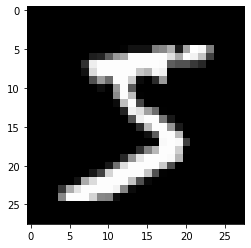

In [6]:
#Image of first digit
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
#First digit classification
train_Y[0]

5

In [39]:
#Vectorize train_X and test_X datasets

def image_to_vector(image):
    #Standardize pixel values between 0 and 1
    scaled_image = image / 255
    #Convert 28 x 28 image arrays into 784 x 1 vectors
    vector = np.reshape(scaled_image, (784,1))
    return vector

training_inputs = [image_to_vector(image) for image in train_X]
test_inputs = [image_to_vector(image) for image in test_X]

training_inputs[0]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [40]:
#Vectorize train_Y dataset

def digit_to_vector(digit):
    vector = np.zeros((10,1))
    vector[digit] = 1
    return vector

training_outputs = [digit_to_vector(digit) for digit in train_Y]

training_outputs[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [54]:
#Cleaned training / test datasets
training_data = [(x,y) for x, y in zip(training_inputs, training_outputs)]
test_data = [(x,y) for x, y in zip(test_inputs, test_Y)]

## Part 2: Neural Network Code

The code in this section was inspired by [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) and [Chapter 2](http://neuralnetworksanddeeplearning.com/chap2.html) of Michael Nielson's book _Neural Networks and Deep Learning_. The first two chapters of Nielson's book are extremely helpful for understanding the concept of neural networks and the math behind gradient descent.

In [23]:
#Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [24]:
#Derivative of sigmoid function
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [91]:
#Create neural network class

class Network(object):
    
    #Network structure
    def __init__(self, layers):
        self.num_layers = len(layers)
        self.layers = layers
        self.biases = [np.random.randn(y, 1) for y in layers[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]
    
    #Output of neural network for input a
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    #Train neural network using stochiastic gradient descent
    def train(self, training_data, epochs, mini_batch_size, learning_rate, test_data=None):
        n_training = len(training_data)
        if test_data:
            n_test = len(test_data)
            self.errors = []
        for j in range(epochs):
            #Generate mini batches
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size]
                            for k in range(0, n_training, mini_batch_size)]
            for mini_batch in mini_batches:
                #Initialize gradient
                nabla_b = [np.zeros(b.shape) for b in self.biases]
                nabla_w = [np.zeros(w.shape) for w in self.weights]
                for x, y in mini_batch:
                    #Initialize change to gradient from single training example
                    delta_nabla_b = [np.zeros(b.shape) for b in self.biases]
                    delta_nabla_w = [np.zeros(w.shape) for w in self.weights]
                    #Forward pass
                    activation = x
                    activations = [x]
                    zs = []
                    for b, w in zip(self.biases, self.weights):
                        z = np.dot(w, activation) + b
                        zs.append(z)
                        activation = sigmoid(z)
                        activations.append(activation)
                    #Backpropagation
                    delta = (activations[-1]-y)*sigmoid_prime(zs[-1])
                    for l in range(2, self.num_layers):
                        z = zs[-l]
                        delta = np.dot(self.weights[-l+1].transpose(), delta) * sigmoid_prime(z)
                        delta_nabla_b[-l] = delta
                        delta_nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
                    #Update gradient
                    nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
                    nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]                
                #Update weights / biases
                self.weights = [w-(learning_rate/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
                self.biases = [b-(learning_rate/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
            #Make predictions if test data is provided
            if test_data:
                correct = 0
                for x, y in test_data:
                    if np.argmax(self.feedforward(x)) == y: 
                        correct += 1
                error = (n_test-correct)/n_test*100
                self.errors.append(error)
                print(f'Epoch {j+1}: {correct} / {n_test} correct, error rate = {round(error, 2)}%')
            else:
                print(f'Epoch {j+1} complete')

## Part 3: Neural Network Experiments

In [92]:
#Three-layer network with one hidden layer of 30 neurons
net1 = Network([784, 30, 10])

In [93]:
#Train network 1 using epochs=30, mini-batch size=10, learning rate=3
net1.train(training_data, 30, 10, 3, test_data=test_data)

Epoch 1: 6797 / 10000 correct, error rate = 32.03%
Epoch 2: 7123 / 10000 correct, error rate = 28.77%
Epoch 3: 7267 / 10000 correct, error rate = 27.33%
Epoch 4: 7287 / 10000 correct, error rate = 27.13%
Epoch 5: 7310 / 10000 correct, error rate = 26.9%
Epoch 6: 7312 / 10000 correct, error rate = 26.88%
Epoch 7: 7344 / 10000 correct, error rate = 26.56%
Epoch 8: 7354 / 10000 correct, error rate = 26.46%
Epoch 9: 7373 / 10000 correct, error rate = 26.27%
Epoch 10: 7363 / 10000 correct, error rate = 26.37%
Epoch 11: 7408 / 10000 correct, error rate = 25.92%
Epoch 12: 7645 / 10000 correct, error rate = 23.55%
Epoch 13: 7875 / 10000 correct, error rate = 21.25%
Epoch 14: 7929 / 10000 correct, error rate = 20.71%
Epoch 15: 7967 / 10000 correct, error rate = 20.33%
Epoch 16: 8015 / 10000 correct, error rate = 19.85%
Epoch 17: 8033 / 10000 correct, error rate = 19.67%
Epoch 18: 8006 / 10000 correct, error rate = 19.94%
Epoch 19: 8044 / 10000 correct, error rate = 19.56%
Epoch 20: 8053 / 10000

In [96]:
#Three-layer network with one hidden layer of 100 neurons
net2 = Network([784, 100, 10])

In [97]:
#Train network 2 using epochs=30, mini-batch size=10, learning rate=3
net2.train(training_data, 30, 10, 3, test_data=test_data)

Epoch 1: 6630 / 10000 correct, error rate = 33.7%
Epoch 2: 7511 / 10000 correct, error rate = 24.89%
Epoch 3: 8504 / 10000 correct, error rate = 14.96%
Epoch 4: 8561 / 10000 correct, error rate = 14.39%
Epoch 5: 8595 / 10000 correct, error rate = 14.05%
Epoch 6: 8645 / 10000 correct, error rate = 13.55%
Epoch 7: 9384 / 10000 correct, error rate = 6.16%
Epoch 8: 9465 / 10000 correct, error rate = 5.35%
Epoch 9: 9489 / 10000 correct, error rate = 5.11%
Epoch 10: 9534 / 10000 correct, error rate = 4.66%
Epoch 11: 9527 / 10000 correct, error rate = 4.73%
Epoch 12: 9541 / 10000 correct, error rate = 4.59%
Epoch 13: 9549 / 10000 correct, error rate = 4.51%
Epoch 14: 9581 / 10000 correct, error rate = 4.19%
Epoch 15: 9570 / 10000 correct, error rate = 4.3%
Epoch 16: 9571 / 10000 correct, error rate = 4.29%
Epoch 17: 9567 / 10000 correct, error rate = 4.33%
Epoch 18: 9577 / 10000 correct, error rate = 4.23%
Epoch 19: 9588 / 10000 correct, error rate = 4.12%
Epoch 20: 9584 / 10000 correct, erro

In [98]:
#Five-layer network with three hidden layers of 30 neurons
net3 = Network([784, 30, 30, 30, 10])

In [99]:
#Train network 3 using epochs=30, mini-batch size=10, learning rate=3
net3.train(training_data, 30, 10, 3, test_data=test_data)

Epoch 1: 8147 / 10000 correct, error rate = 18.53%
Epoch 2: 9135 / 10000 correct, error rate = 8.65%
Epoch 3: 9261 / 10000 correct, error rate = 7.39%
Epoch 4: 9272 / 10000 correct, error rate = 7.28%
Epoch 5: 9362 / 10000 correct, error rate = 6.38%
Epoch 6: 9382 / 10000 correct, error rate = 6.18%
Epoch 7: 9421 / 10000 correct, error rate = 5.79%
Epoch 8: 9412 / 10000 correct, error rate = 5.88%
Epoch 9: 9449 / 10000 correct, error rate = 5.51%
Epoch 10: 9464 / 10000 correct, error rate = 5.36%
Epoch 11: 9441 / 10000 correct, error rate = 5.59%
Epoch 12: 9473 / 10000 correct, error rate = 5.27%
Epoch 13: 9463 / 10000 correct, error rate = 5.37%
Epoch 14: 9470 / 10000 correct, error rate = 5.3%
Epoch 15: 9497 / 10000 correct, error rate = 5.03%
Epoch 16: 9494 / 10000 correct, error rate = 5.06%
Epoch 17: 9486 / 10000 correct, error rate = 5.14%
Epoch 18: 9423 / 10000 correct, error rate = 5.77%
Epoch 19: 9513 / 10000 correct, error rate = 4.87%
Epoch 20: 9486 / 10000 correct, error ra

In [100]:
#Five-layer network with three hidden layers of 100 neurons
net4 = Network([784, 100, 100, 100, 10])

In [101]:
#Train network 4 using epochs=30, mini-batch size=10, learning rate=3
net4.train(training_data, 30, 10, 3, test_data=test_data)

Epoch 1: 8315 / 10000 correct, error rate = 16.85%
Epoch 2: 8487 / 10000 correct, error rate = 15.13%
Epoch 3: 8550 / 10000 correct, error rate = 14.5%
Epoch 4: 8583 / 10000 correct, error rate = 14.17%
Epoch 5: 8607 / 10000 correct, error rate = 13.93%
Epoch 6: 8642 / 10000 correct, error rate = 13.58%
Epoch 7: 8629 / 10000 correct, error rate = 13.71%
Epoch 8: 8674 / 10000 correct, error rate = 13.26%
Epoch 9: 8659 / 10000 correct, error rate = 13.41%
Epoch 10: 8697 / 10000 correct, error rate = 13.03%
Epoch 11: 8711 / 10000 correct, error rate = 12.89%
Epoch 12: 8705 / 10000 correct, error rate = 12.95%
Epoch 13: 8663 / 10000 correct, error rate = 13.37%
Epoch 14: 8693 / 10000 correct, error rate = 13.07%
Epoch 15: 8685 / 10000 correct, error rate = 13.15%
Epoch 16: 8691 / 10000 correct, error rate = 13.09%
Epoch 17: 8737 / 10000 correct, error rate = 12.63%
Epoch 18: 8700 / 10000 correct, error rate = 13.0%
Epoch 19: 8719 / 10000 correct, error rate = 12.81%
Epoch 20: 8761 / 10000 

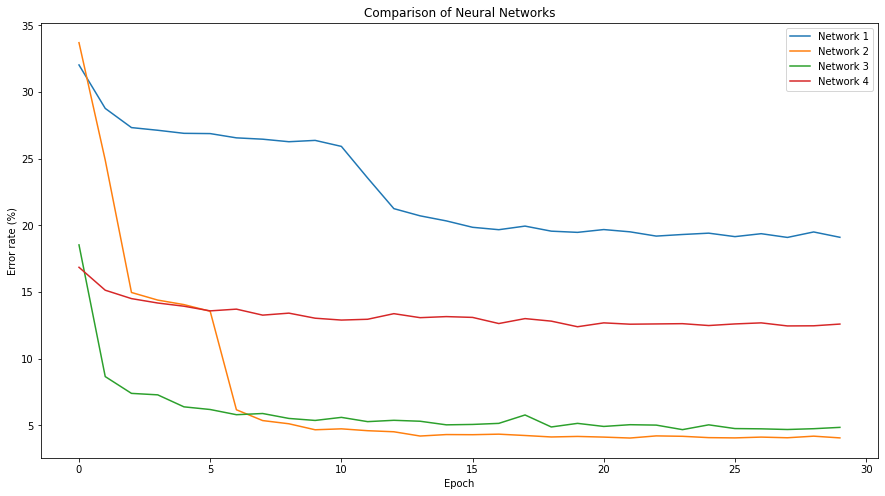

In [117]:
#Compare networks
plt.figure(figsize=(15,8))
plt.plot(net1.errors)
plt.plot(net2.errors)
plt.plot(net3.errors)
plt.plot(net4.errors)
plt.xlabel('Epoch')
plt.ylabel('Error rate (%)')
plt.title('Comparison of Neural Networks')
plt.legend(['Network 1', 'Network 2', 'Network 3', 'Network 4'])
plt.show()

Network 2 (the three-layer network with one hidden layer of 100 neurons) performs the best, classifying images in the test dataset with 96% accuracy after 30 epochs of training.